# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **_Your Name_** | _Your Email_ | **_Project Name_** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../../data/processed/df.pkl')

In [3]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,sugared raspberries,10,37449,2005-05-02,"['15-minutes-or-less', 'time-to-make', 'course...","[838.0, 1.0, 820.0, 0.0, 2.0, 0.0, 71.0]",6,"['carefully pick over the berries , removing l...",here's an old method for preserving fruit with...,"['raspberries', 'granulated sugar']",2


# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [4]:
df.shape

(1108856, 16)

## IV.B. Data Information Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108856 entries, 0 to 1132366
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1108856 non-null  object        
 1   recipe_id       1108856 non-null  object        
 2   date            1108856 non-null  datetime64[ns]
 3   rating          1108856 non-null  int64         
 4   review          1108688 non-null  object        
 5   name            1108856 non-null  object        
 6   minutes         1108856 non-null  int64         
 7   contributor_id  1108856 non-null  object        
 8   submitted       1108856 non-null  datetime64[ns]
 9   tags            1108856 non-null  object        
 10  nutrition       1108856 non-null  object        
 11  n_steps         1108856 non-null  int64         
 12  steps           1108856 non-null  object        
 13  description     1108856 non-null  object        
 14  ingredients     1108856

## IV.C. Missing Values Inspection

In [6]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,user_id,0.000000
1,recipe_id,0.000000
2,date,0.000000
3,rating,0.000000
4,name,0.000000
5,minutes,0.000000
6,contributor_id,0.000000
7,submitted,0.000000
8,tags,0.000000
9,nutrition,0.000000


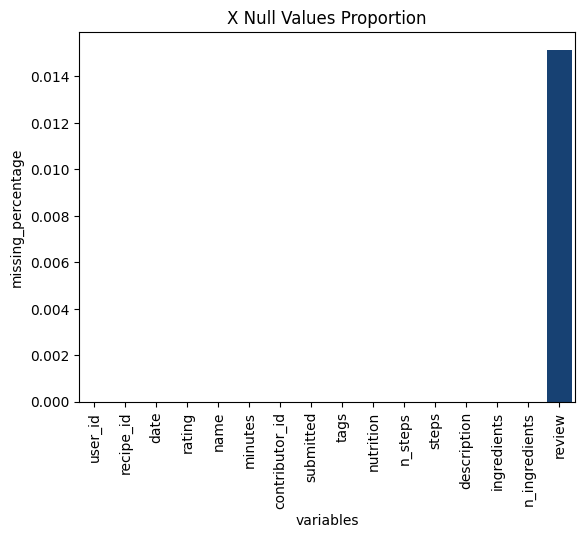

In [7]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            palette='Blues')
plt.title("X Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

## IV.D. Duplicated Values Inspection

In [8]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.shape

(0, 16)

In [9]:
df_duplicated

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


## IV.E. Data Visualization

### IV.E.1. Target Label Proportion

In [ ]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(data=y, x=y["target_label"], palette='Set2')
y_proportion.bar_label(y_proportion.containers[0])
plt.show()

In [ ]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x=y.value_counts(),
        labels=y["target_label"].value_counts(),
        colors=sns.color_palette('Set3'),
        autopct='%1.1f%%')
plt.show()

### IV.E.2. _Column Name_ Distribution

In [ ]:
plt.title("Column Name Distribution")
column_name_proportion = sns.countplot(data=X, x="column_name", palette='Set1')
column_name_proportion.bar_label(column_name_proportion.containers[0])
plt.show()

## IV.F. Statistical Analysis

### IV.F.1. Statistical Description

In [ ]:
X.describe()

### IV.F.2. Skewness Analysis

In [ ]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_skewness = X[numeric_columns].skew()
X_skewness = pd.DataFrame(
    {"variables": X_skewness.index, "skewness": X_skewness.values})

In [ ]:
plt.title("Skewness Analysis")
plt.bar(X_skewness["variables"], X_skewness["skewness"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

## IV.G. Correlation Matrix

In [ ]:
X.corr()

In [ ]:
sns.heatmap(data=X.corr())

# V. Preprocessing

## V.A. Columns Reorder

In [ ]:
custom_order = ["column_0", "column_1", "column_2"]

In [ ]:
X = X.reindex(columns=custom_order)
X.shape

In [ ]:
X.head()

## V.B. Specific Preprocessing

## V.D. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

## V.E. Export Data

In [ ]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')